# Import scientific python libraries

Including the seaborn library that we will be using for the first time today.

![Seaborn Logo](https://raw.githubusercontent.com/mwaskom/seaborn/master/doc/_static/logo-wide-lightbg.svg)

The Seaborn library is a powerful Python data visualization library built on top of Matplotlib, specifically designed to create visually appealing and informative statistical graphics. It simplifies the creation of complex visualizations by providing an intuitive API and a wide array of built-in themes and color palettes, making it easier to analyze and interpret data.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing distributions of data and comparing populations

Today we are going to move to dealing with a different type of data -- igneous geochemistry data. Igneous rocks are those that crystallize from cooling magma. Different magmas have different compositions associated with their origin. During class today, we will focuse on data from lava flows (this are called volcanics rocks).

There is a big database of geochemical data from rocks called Earthchem: https://www.earthchem.org

## Import a dataframe of igneous geochemistry data

Let's deal with a subset of data from Earthchem that contains geochemical data from igneous rocks. In the data folder it is in a file called `ign.csv` although it is actually tab-separated (we need to put `sep='\t'` as a parameter). It comes from here: https://github.com/brenhinkeller/StatisticalGeochemistry

In [2]:
igneous_data = pd.read_csv('data/ign.csv', sep='\t', dtype={4: str})

Let's look at what data are available.

In [3]:
igneous_data.columns

Index(['ID', 'SAMPLE ID', 'SOURCE', 'REFERENCE', 'LOCALITY', 'METHODS',
       'MATERIAL', 'TYPE', 'COMPOSITION', 'ROCK NAME', 'ID.1', 'LATITUDE',
       'LONGITUDE', 'LOC PREC', 'MIN AGE', 'MAX AGE', 'AGE', 'SIO2', 'TIO2',
       'AL2O3', 'FE2O3', 'FE2O3T', 'FEO', 'FEOT', 'MGO', 'CAO', 'NA2O', 'K2O',
       'P2O5', 'MNO', 'H2O_TOTAL', 'LA', 'CE', 'PR', 'ND', 'SM', 'EU', 'GD',
       'TB', 'DY', 'HO', 'ER', 'TM', 'YB', 'LU', 'LI', 'BE', 'B', 'C', 'CO2',
       'F', 'CL', 'SC', 'TI', 'V', 'CR', 'CO', 'NI', 'CU', 'ZN', 'GA', 'ZR',
       'OS', 'RB', 'BI', 'HG', 'BA', 'Y', 'PB', 'TE', 'NB', 'SR87_SR86', 'TL',
       'PT', 'SN', 'CD', 'AS', 'PD', 'SR', 'SE', 'S', 'AU', 'TA', 'MO', 'U',
       'CS', 'SB', 'AG', 'W', 'TH', 'RE', 'HF', 'IR'],
      dtype='object')

Lots of different geochemical data. Note that the major elements (e.g. `FE2O3`) are given as weight percent and the the minor elements are parts per million (ppm) (e.g. `AG`).

## Filter to look at volcanics

Let's make it so that we are only dealing with the data from volcanic rocks, by filting on `TYPE`.

In [4]:
volcanic_data = igneous_data[igneous_data['TYPE']=='VOLCANIC']
volcanic_data.head()

,ID,SAMPLE ID,SOURCE,REFERENCE,LOCALITY,METHODS,MATERIAL,TYPE,COMPOSITION,ROCK NAME,ID.1,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,MAX AGE,AGE,SIO2,TIO2,AL2O3,FE2O3,FE2O3T,FEO,FEOT,MGO,CAO,NA2O,K2O,P2O5,MNO,H2O_TOTAL,LA,CE,PR,ND,SM,EU,GD,TB,DY,HO,ER,TM,YB,LU,LI,BE,B,C,CO2,F,CL,SC,TI,V,CR,CO,NI,CU,ZN,GA,ZR,OS,RB,BI,HG,BA,Y,PB,TE,NB,SR87_SR86,TL,PT,SN,CD,AS,PD,SR,SE,S,AU,TA,MO,U,CS,SB,AG,W,TH,RE,HF,IR
0,KV68702,D102672,USGS,"USGS, 2004",NaN,UNKNOWN,IGNEOUS,VOLCANIC,MAFIC,BASALT,68702,19.25,-155.13,0.01,0.0,0.01,0.01,49.97,2.57,13.11,1.83,12.49892,9.60,NaN,9.06,10.58,2.24,0.47,0.26,0.17,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,0.02,0.04,0.01,50.0,1.00,500.0,500.0,50.0,200.0,150.0,NaN,30.0,150.0,NaN,NaN,NaN,NaN,150.0,50.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KV68698,W250537,USGS,"USGS, 2004",NaN,WDXRF; TITR; INAA; ICPAES; GRAV; FIS; EDXRF; AAS,IGNEOUS,VOLCANIC,MAFIC,BASALT,68698,38.63,-77.79,0.01,144.0,206.00,175.00,49.90,1.11,13.90,NaN,13.70000,9.00,NaN,6.65,9.46,2.76,0.76,0.13,0.21,NaN,8.8,18.0,NaN,11.0,3.20,1.02,NaN,0.70,NaN,NaN,NaN,NaN,3.10,0.45,18.0,NaN,NaN,NaN,0.04,NaN,NaN,43.8,0.67,351.0,84.2,50.3,32.0,130.0,100.0,19.0,91.0,NaN,27.00,NaN,NaN,240.0,27.0,6.0,NaN,3.9,NaN,NaN,8.6,NaN,NaN,NaN,8.5,240.0,NaN,NaN,6.6,0.31,NaN,0.43,0.40,NaN,NaN,NaN,1.90,NaN,2.50,NaN
5,KV68697,W250536,USGS,"USGS, 2004",NaN,WDXRF; TITR; INAA; ICPAES; GRAV; FIS; EDXRF; AAS,IGNEOUS,VOLCANIC,MAFIC,BASALT,68697,38.63,-77.79,0.01,144.0,206.00,175.00,49.90,1.05,13.80,NaN,12.90000,8.60,NaN,6.24,8.88,3.77,0.60,0.12,0.22,NaN,7.7,17.0,NaN,9.2,2.94,0.97,NaN,0.69,NaN,NaN,NaN,NaN,2.70,0.38,20.0,NaN,NaN,NaN,0.48,NaN,NaN,41.6,0.66,354.0,72.6,47.9,51.0,159.0,95.0,18.0,82.0,NaN,19.00,NaN,NaN,170.0,25.0,5.0,NaN,3.5,NaN,NaN,12.0,NaN,NaN,NaN,4.6,350.0,NaN,NaN,6.4,0.27,NaN,0.77,0.53,NaN,NaN,NaN,1.90,NaN,2.20,NaN
14,KV68688,M199970,USGS,"USGS, 2004",NaN,WDXRF; TITR; INAA; ICPAES; GRAV; FIS; EDXRF; AAS,IGNEOUS,VOLCANIC,MAFIC,BASALT,68688,57.45,-133.92,0.01,65.0,248.00,156.50,49.90,1.34,16.10,NaN,7.84000,4.36,NaN,8.82,6.72,4.49,0.70,0.13,0.10,NaN,4.8,12.0,NaN,7.7,2.59,0.97,3.00,0.43,NaN,NaN,NaN,NaN,1.20,0.18,NaN,NaN,NaN,NaN,0.68,NaN,NaN,43.2,NaN,300.0,266.0,36.0,80.0,78.0,190.0,NaN,98.0,NaN,9.40,NaN,NaN,150.0,24.0,NaN,NaN,10.0,NaN,NaN,6.5,NaN,NaN,1.7,9.8,380.0,NaN,0.01,NaN,0.40,NaN,NaN,0.22,NaN,NaN,NaN,0.50,NaN,2.10,NaN
16,KV68686,M180720,USGS,"USGS, 2004",NaN,WDXRF; TITR; INAA; ICPAES; GRAV; EDXRF,IGNEOUS,VOLCANIC,MAFIC,BASALT,68686,60.06,-160.39,0.01,65.0,248.00,156.50,49.90,0.86,15.70,NaN,10.90000,7.49,NaN,4.10,6.38,5.10,1.14,0.28,0.24,NaN,10.9,25.7,NaN,13.9,3.35,1.00,3.97,0.54,NaN,NaN,NaN,0.34,2.19,0.31,NaN,NaN,NaN,NaN,1.76,NaN,NaN,31.7,NaN,270.0,14.1,26.6,9.9,NaN,81.7,NaN,90.1,NaN,9.99,NaN,NaN,1300.0,20.0,NaN,NaN,8.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,NaN,0.49,NaN,0.61,0.22,NaN,NaN,NaN,1.53,NaN,2.01,NaN


## Visualizing the data

A type of visualization we have used a fair amount are histograms. Let's plot up how much SiO$_2$ there is in the volcanics rocks that are in the Earthchem database.

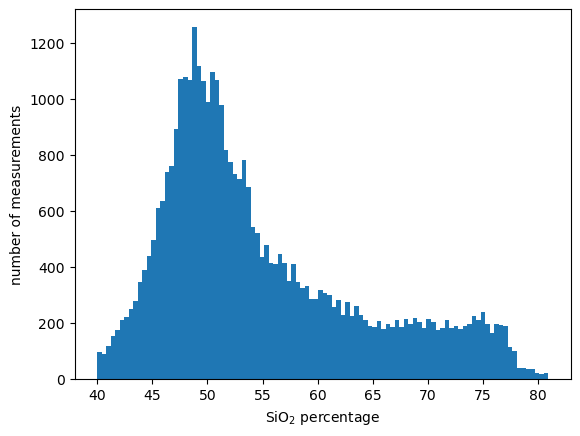

In [5]:
plt.figure()
plt.hist(volcanic_data['SIO2'],bins=100)
plt.xlabel('SiO$_2$ percentage')
plt.ylabel('number of measurements')
plt.show()

Recall that instead of having the y-axis be number of values, we can have it be density using `density=True` (normalized to form a probability density, i.e., the area under the histogram will sum to 1). Given that the count itself is rather arbitary, this can be an advantageous way to plot a distribution.

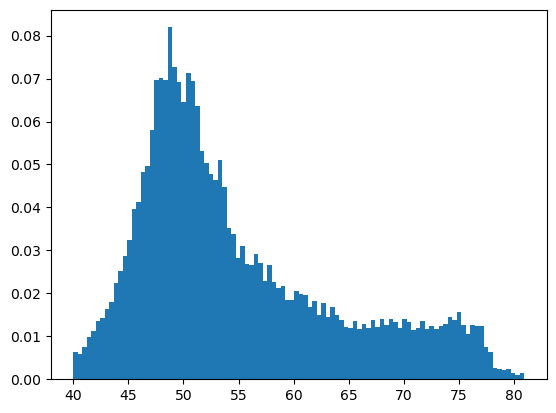

In [6]:
plt.figure()
plt.hist(volcanic_data['SIO2'],bins=100,density=True)
plt.show()

## Kernel density estimate

One of the ways of representing the distribution of a set of datapoints is known as the 'kernel density estimate'. This is a useful way of showing the distribution of data. It places a 'kernel' (generally a normal distribution) at each data point and then sums them up.  This avoids the awkwardness of needing to chose a bin size associated with histograms, for example.

Here is an illustration of how this works.

<img src="./images/kde.png" width = 600>

> [Source: https://commons.wikimedia.org/wiki/File:Comparison_of_1D_histogram_and_KDE.png Wikimedia Creative Commons] 

There are two choices that are consequential when developing a kernel density estimate: the shape of the "kernel" and the bandwidth that sets the width of the kernel. The shape doesn't end up mattering too much, but the bandwidth very much does. There are "rules of thumb" for the bandwidth that are implemented as the defaults (and therefore often used), but these can be adjusted and it often isn't clear what the "right choice" is. A smaller bandwidth will produce a more detailed estimate with higher peaks and valleys, while a larger bandwidth will result in a smoother, less detailed curve.

### Developing a kernel density estimate with ```kdeplot```

The seaborn function ```kdeplot``` generates a kernal density estimate and then plots it. Note that seaborn provides convenience wrapper functions around other scientific python packages. It is using `matplotlib` for plotting and it is using `statsmodels`, `scipy` and `numpy` for the statistical methods. It combines these into functions that can quickly get these tasks done. The default is a gaussian kernel and Scott's rule of thumb for the bandwidth.

/var/folders/gc/lpnp82h92tv35c_7v97w97cm0000gn/T/ipykernel_13521/2686567546.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(volcanic_data['SIO2'],shade=True)


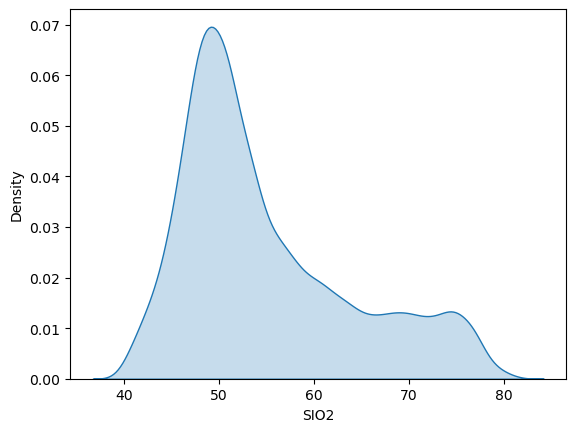

In [7]:
plt.figure()
sns.kdeplot(volcanic_data['SIO2'],shade=True)
plt.show()

We can plot a kernel density estimate curve along with a density-normalized histogram using `sns.histplot()` with a parameter of `kde=True`

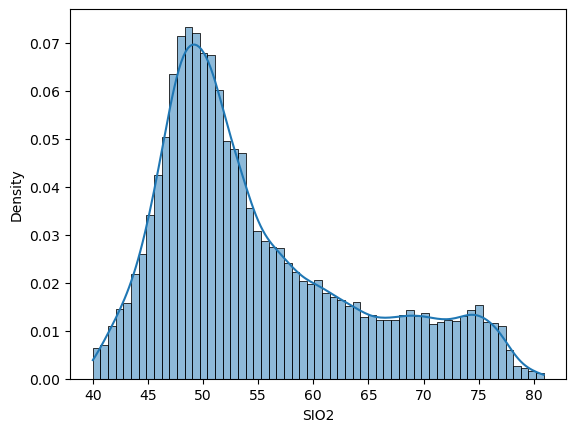

In [8]:
plt.figure()
sns.histplot(volcanic_data['SIO2'], kde=True, stat="density")
plt.show()

## Making a bivariant histogram/scatter plot

If we want to investigate how another aspect of the chemistry of volcanic rocks relates to silica content, we can use `sns.joinplot` to make a cross-plot. Here let's look at how iron content (FeO) relates to silica content (SIO$_2$).

<Figure size 640x480 with 0 Axes>

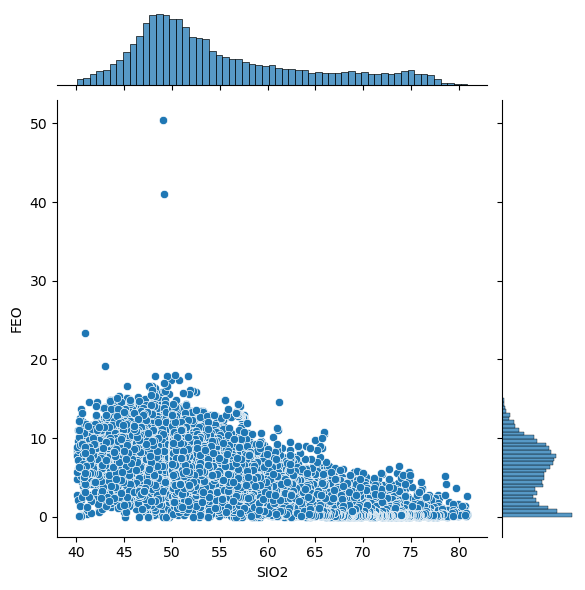

In [9]:
plt.figure()
sns.jointplot(x=volcanic_data['SIO2'], y=volcanic_data['FEO'])
plt.show()

It is pretty hard to see what is going on there. Perhaps it will be better if we change the y limit so that it is tighter on the data and make the symbols have a transparency.

<Figure size 640x480 with 0 Axes>

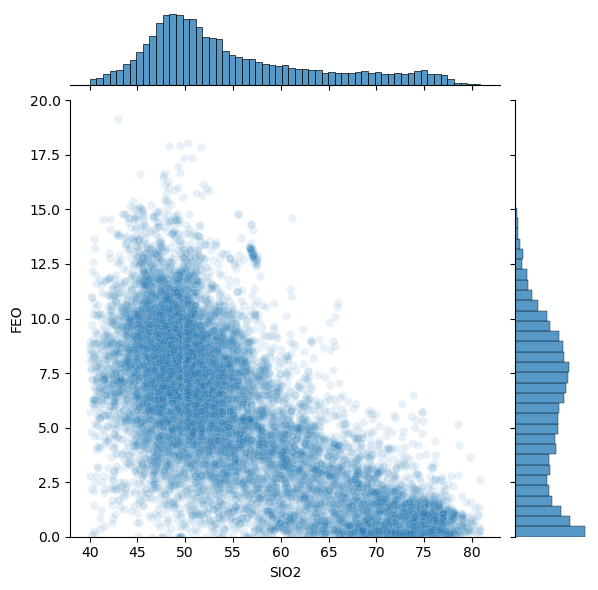

In [10]:
plt.figure()
sns.jointplot(x=volcanic_data['SIO2'], y=volcanic_data['FEO'],alpha=0.1)
plt.ylim(0,20)
plt.show()

## Making a bivariant kernel density plot

Still pretty hard to see what is going on in the above plot, but it is an improvement. Let's put kernel density estimates to use. Here the same kernel density estimate is used and shown for the univariate data on each axis. However, we now have a bivariate kernel density estimate as well. Taken together we can see that there is a strong relationship between SiO$_2$ levels and FeO levels in volcanic rocks.

<Figure size 640x480 with 0 Axes>

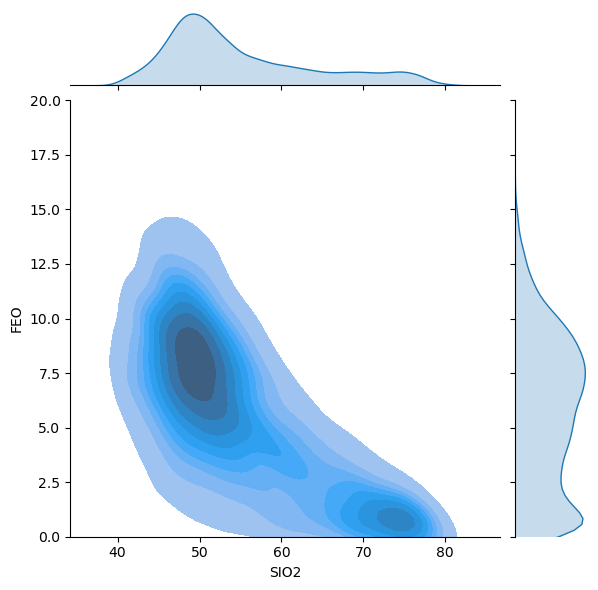

In [11]:
plt.figure()
sns.jointplot(x=volcanic_data['SIO2'], 
              y=volcanic_data['FEO'],
              kind='kde',
              joint_kws={'fill': True})
plt.ylim(0,20)
plt.show()

## Mafic vs. felsic

This illustration provides an overview of the compositional difference between different types of igneous rocks:

<img src="./images/mafic_felsic.jpg" width = 600>

These compositional differences manifest in different material properties which can be observed at active volcanos:

- mafic lava flowing (Kilauea, Hawaii): https://www.youtube.com/watch?v=amTENlOiVFU
- dacite dome growing within Mount Saint Helens: https://www.youtube.com/watch?v=h6B1myUKAS4 https://www.youtube.com/watch?v=3v7p9mMV6M8 *composition of 65 percent SiO2 (dacite)*
- eruption of Mount Saint Helens: https://www.youtube.com/watch?v=AYla6q3is6w
- intermediate eruption (Krakatau, Indonesia): https://www.youtube.com/watch?v=NLhjNzQHphQ

## Evaluating compositional differences between mafic, intermediate and felsic volcanics (iron)

Let's first focus on the difference between the iron contents.

We can plot up histograms. Using the `histtype='step'` parameter enables us to see multiple histograms plotted atop one another.

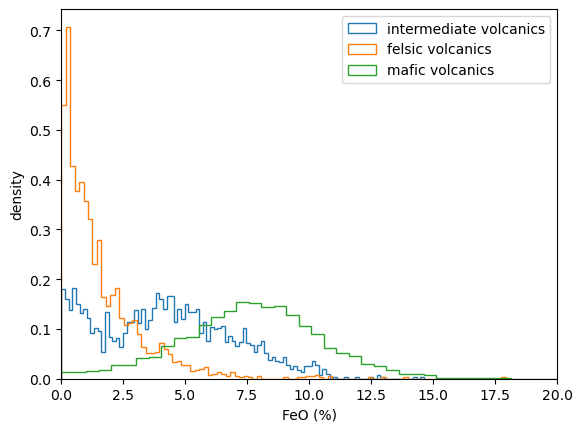

In [12]:
plt.figure()
plt.hist(volcanic_data[volcanic_data['COMPOSITION']=='INTERMEDIATE']['FEO'],
         bins=100,density=True,label='intermediate volcanics',histtype='step')
plt.hist(volcanic_data[volcanic_data['COMPOSITION']=='FELSIC']['FEO'],
         bins=100,density=True,label='felsic volcanics',histtype='step')
plt.hist(volcanic_data[volcanic_data['COMPOSITION']=='MAFIC']['FEO'],
         bins=100,density=True,label='mafic volcanics',histtype='step')
plt.xlim(0,20)
plt.xlabel('FeO (%)')
plt.ylabel('density')
plt.legend()
plt.show()

The curves can also be plotted atop one another using `sns.kdeplot`

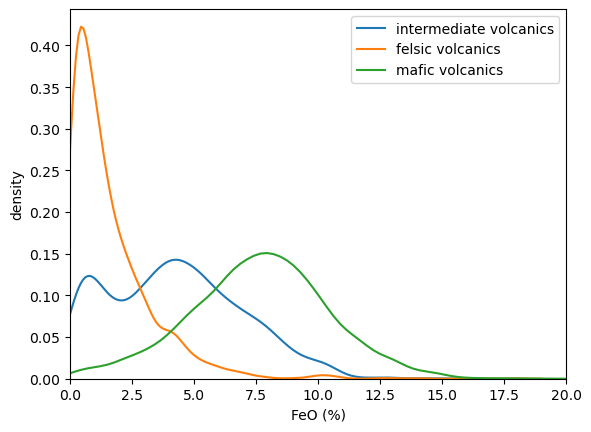

In [13]:
plt.figure()
sns.kdeplot(volcanic_data[volcanic_data['COMPOSITION']=='INTERMEDIATE']['FEO'],label='intermediate volcanics')
sns.kdeplot(volcanic_data[volcanic_data['COMPOSITION']=='FELSIC']['FEO'],label='felsic volcanics')
sns.kdeplot(volcanic_data[volcanic_data['COMPOSITION']=='MAFIC']['FEO'],label='mafic volcanics')
plt.xlim(0,20)
plt.xlabel('FeO (%)')
plt.ylabel('density')
plt.legend()
plt.show()

## Other way to visualize the distributions

### The box plot

> A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range. *From seaborn docstring*

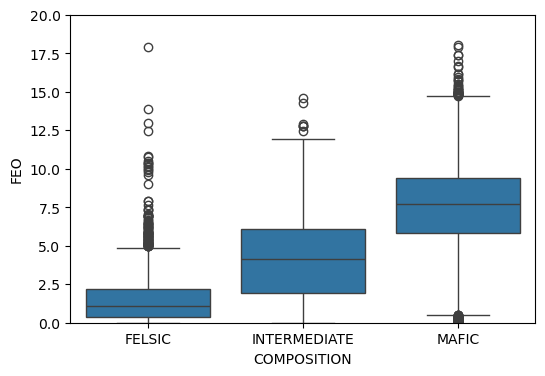

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x="COMPOSITION", y="FEO", data=volcanic_data, order=['FELSIC','INTERMEDIATE','MAFIC'])
plt.ylim(0,20)
plt.show()

### Violin plot

Perhaps you like box plots, but you also have a new-found love of probability density estimates. Well you are in luck as the violin plot puts them both together. The width of the "violin" represents the kernel density estimate while the black bar is the same values as the box plot with the white dot being the median.

/var/folders/gc/lpnp82h92tv35c_7v97w97cm0000gn/T/ipykernel_13521/47781212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="COMPOSITION", y="FEO", data=volcanic_data, order=['FELSIC','INTERMEDIATE','MAFIC'], palette='Set2')


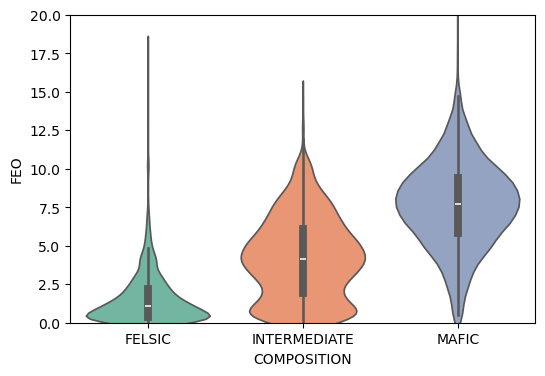

In [15]:
plt.figure(figsize=(6,4))
sns.violinplot(x="COMPOSITION", y="FEO", data=volcanic_data, order=['FELSIC','INTERMEDIATE','MAFIC'], palette='Set2')
plt.ylim(0,20)
plt.show()

## Evaluating compositional differences between mafic, intermediate and felsic volcanics (sodium)

Looking at the these illustration of composition plot we see that it indicates that there is more iron in mafic rocks (which looks to be the case). It also indicated that there is more sodium (Na) in felsic rocks.

<img src="./images/mafic_felsic.jpg" width = 600>

**Code for you to write**

 Make the following plots to evaluate this assertion:

- jointplot of NA2O vs SIO2 for the entire volcanic_data set. make one joint plot that is `kind='kde'` and one that is `kind='hex'`
- violin plot (`sns.violinplot`) of NA2O categorized by composition

<Figure size 640x480 with 0 Axes>

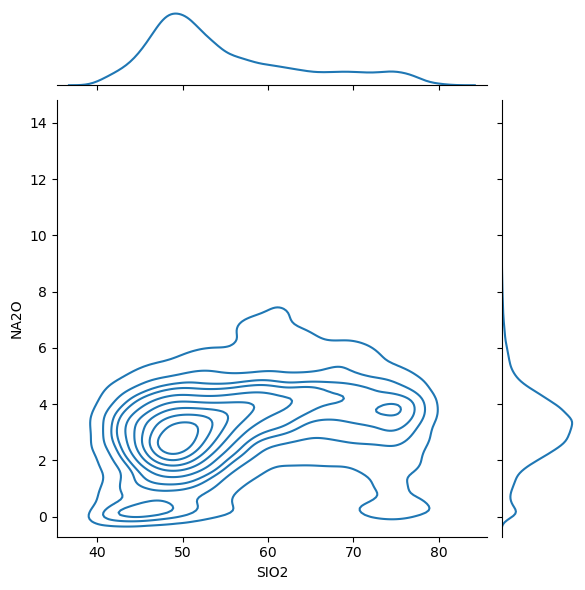

In [16]:
plt.figure()
sns.jointplot(x=volcanic_data['SIO2'], y=volcanic_data['NA2O'], kind='kde')
plt.show()

<Figure size 640x480 with 0 Axes>

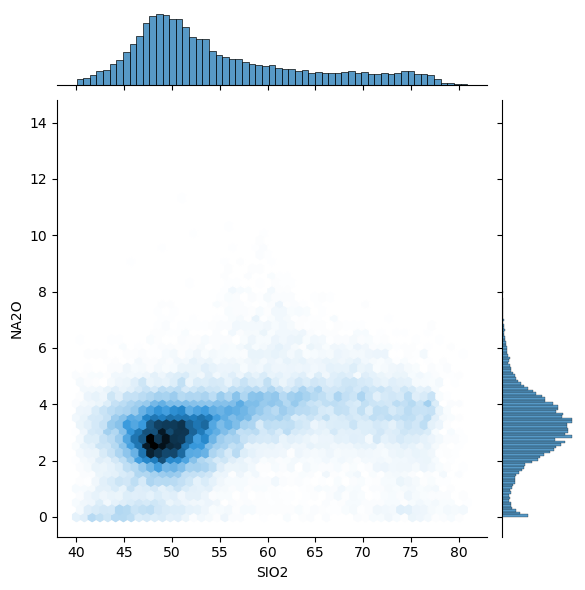

In [17]:
plt.figure()
sns.jointplot(x=volcanic_data['SIO2'], y=volcanic_data['NA2O'],kind='hex')
plt.show()

/var/folders/gc/lpnp82h92tv35c_7v97w97cm0000gn/T/ipykernel_13521/2893520917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="COMPOSITION", y="NA2O", data=volcanic_data, order=['FELSIC','INTERMEDIATE','MAFIC'], palette="muted")


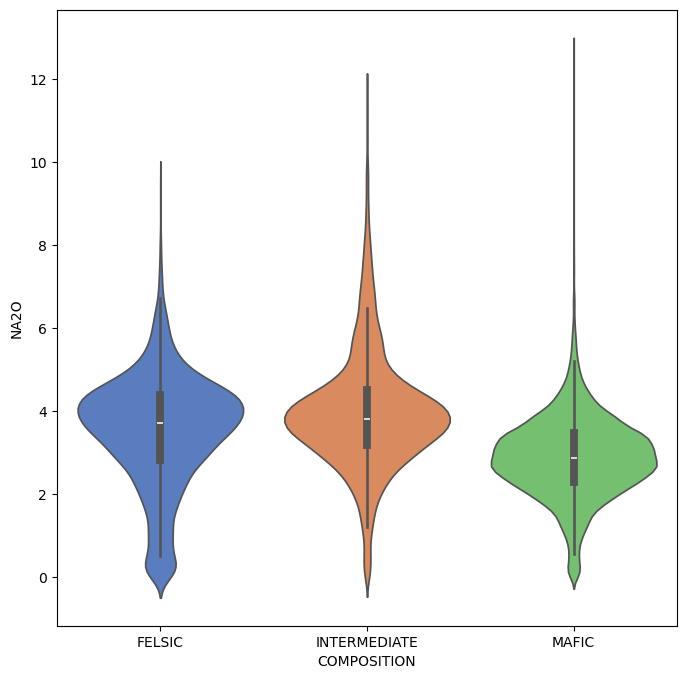

In [18]:
plt.figure(figsize=(8,8))
sns.violinplot(x="COMPOSITION", y="NA2O", data=volcanic_data, order=['FELSIC','INTERMEDIATE','MAFIC'], palette="muted")
plt.show()

**Code for you to write**

Once you have made these visualizations, calculate the mean NA2O in felsic, intermediate and mafic volcanics. Assign these values to be `mafic_NA20_mean`, `intermediate_NA20_mean` and `felsic_NA20_mean` and print them.

In [19]:
mafic_NA20_mean = np.mean(volcanic_data[volcanic_data['COMPOSITION']=='MAFIC']['NA2O'])
intermediate_NA20_mean = np.mean(volcanic_data[volcanic_data['COMPOSITION']=='INTERMEDIATE']['NA2O'])
felsic_NA20_mean = np.mean(volcanic_data[volcanic_data['COMPOSITION']=='FELSIC']['NA2O'])
print('mafic mean NA20 = ', mafic_NA20_mean)
print('interm. mean NA20 = ', intermediate_NA20_mean)
print('felsic mean NA20 = ', felsic_NA20_mean)

mafic mean NA20 =  2.8843032372697723
interm. mean NA20 =  3.9643710676156587
felsic mean NA20 =  3.523135415441176


Do these values fit with the schematic illustration of the felsic/mafic diagram? What is consistent and what isn't?

# A/B Testing 

> In modern data analytics, deciding whether two numerical samples come from the same underlying distribution is called A/B testing. The name refers to the labels of the two samples, A and B. 

> **The Hypotheses**

> We can try to answer this question by a test of hypotheses. The chance model that we will test says that there is no underlying difference in the populations; the distributions in the samples are different just due to chance.

> Formally, this is the null hypothesis. We are going to have to figure out how to simulate a useful statistic under this hypothesis. But as a start, let's just state the two natural hypotheses.

*from https://www.inferentialthinking.com/chapters/12/1/AB_Testing.html*

In the example in Data 8, students are asked to consider the birth weight of babies when the mother was a smoker and when the mother was a nonsmoker. The two hypotheses and the test statistic were:

> **Null hypothesis**: In the population, the distribution of birth weights of babies is the same for mothers who don't smoke as for mothers who do. The difference in the sample is due to chance.

> **Alternative hypothesis**: In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

> **Test Statistic**

> The alternative hypothesis compares the average birth weights of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.

> We will do the subtraction in the order "average weight of the smoking group  − average weight of the non-smoking group". Small values (that is, large negative values) of this statistic will favor the alternative hypothesis.

We can use this same approach in considering the sodium content of the lava samples. where the **Null hypothesis** is that sodium content is the same for rocks of different compositions and differences in the sample is the result of chance. The **Alternative hypothesis** is that the sodium content of felsic lavas is, on average, higher.

## Testing the null hypothesis that there is no difference in the sodium content of mafic and felsic lavas

To start with, let's consider the difference between mafic and felsic lavas.

We can make a simplified Dataframe that just contains `composition`, `'SIO2'`, and `'NA2O'`

In [20]:
#filter dataframe to just be Felsic and Mafic volcanics
volcanic_felsic_mafic = volcanic_data[(volcanic_data['COMPOSITION']=='FELSIC') | (volcanic_data['COMPOSITION']=='MAFIC')]
#filter dataframe to just have composition, 'SIO2', and 'NA2O' columns
volcanic_felsic_mafic = pd.DataFrame(volcanic_felsic_mafic,columns=['COMPOSITION','SIO2','NA2O'])
#drop rows where there are missing data
volcanic_felsic_mafic = volcanic_felsic_mafic.dropna()
volcanic_felsic_mafic.tail()

,COMPOSITION,SIO2,NA2O
66051,FELSIC,67.77,5.17
66052,FELSIC,67.56,6.12
66053,FELSIC,67.39,4.98
66055,FELSIC,63.99,4.67
66082,MAFIC,50.45,7.36


We can calculate the mean of Na$_2$O in felsic and mafic rocks and calculate the difference.

In [21]:
felsic_NA20_mean = np.mean(volcanic_felsic_mafic[volcanic_felsic_mafic['COMPOSITION']=='FELSIC']['NA2O'])
mafic_NA20_mean = np.mean(volcanic_felsic_mafic[volcanic_felsic_mafic['COMPOSITION']=='MAFIC']['NA2O'])

felsic_NA20_mean - mafic_NA20_mean

0.6388321781714046

Let's define a function that can make this calculation and make a function for median difference too while we are at it:

In [22]:
def difference_of_means(dataframe, value, category_column, category_values):
    """
    Calculate the difference between the means of two categories in a given dataframe.
    
    Parameters
    ----------
    dataframe : pandas.DataFrame
        The input dataframe containing the data.
    value : str
        The column name for which the mean will be calculated.
    category_column : str
        The column name that will be used to categorize the data.
    category_values : list of str
        A list containing two distinct values of the category_column used to separate the data into two groups.
        
    Returns
    -------
    float
        The difference between the means of the two categories.
    """
    mean_1 = np.mean(dataframe[dataframe[category_column] == category_values[0]][value])
    mean_2 = np.mean(dataframe[dataframe[category_column] == category_values[1]][value])
    return mean_1 - mean_2

def difference_of_medians(dataframe, value, category_column, category_values):
    """
    Calculate the difference between the medians of two categories in a given dataframe.
    
    Parameters
    ----------
    dataframe : pandas.DataFrame
        The input dataframe containing the data.
    value : str
        The column name for which the median will be calculated.
    category_column : str
        The column name that will be used to categorize the data.
    category_values : list of str
        A list containing two distinct values of the category_column used to separate the data into two groups.
        
    Returns
    -------
    float
        The difference between the medians of the two categories.
    """
    median_1 = np.median(dataframe[dataframe[category_column] == category_values[0]][value])
    median_2 = np.median(dataframe[dataframe[category_column] == category_values[1]][value])
    return median_1 - median_2

In [23]:
felsic_mafic_mean_diff = difference_of_means(volcanic_felsic_mafic,'NA2O','COMPOSITION',['FELSIC','MAFIC'])
felsic_mafic_mean_diff

0.6388321781714046

In [24]:
felsic_mafic_median_diff = difference_of_medians(volcanic_felsic_mafic,'NA2O','COMPOSITION',['FELSIC','MAFIC'])
felsic_mafic_median_diff

0.8300000000000001

## Testing the null hypothesis through random permutation

The difference of the means suggests that the alternative hypothesis that felsic lavas have more sodium on average is true. However, the difference is quite small (less than 1%). How can we test that this is not the result of chance?

> **Predicting the Statistic Under the Null Hypothesis**

> To see how the statistic should vary under the null hypothesis, we have to figure out how to simulate the statistic under that hypothesis. A clever method based on random permutations does just that

If there were no difference between the two distributions in the underlying population, then the sodium content of a lava sample should not depend on whether it is mafic or felsic. Consequently, the average should remain the same, regardless of the rock type. The idea, then, is to shuffle all the labels randomly among the rock samples. This process is called random permutation.

In [25]:
volcanic_felsic_mafic['COMPOSITION_Shuffled'] = np.random.permutation(volcanic_felsic_mafic['COMPOSITION'].values)
volcanic_felsic_mafic.tail()

,COMPOSITION,SIO2,NA2O,COMPOSITION_Shuffled
66051,FELSIC,67.77,5.17,MAFIC
66052,FELSIC,67.56,6.12,MAFIC
66053,FELSIC,67.39,4.98,MAFIC
66055,FELSIC,63.99,4.67,MAFIC
66082,MAFIC,50.45,7.36,MAFIC


Now we can calculate the difference of the means with the shuffled labels.

In [26]:
difference_of_means(volcanic_felsic_mafic,'NA2O','COMPOSITION_Shuffled',['FELSIC','MAFIC'])

-0.025417036824453287

The above difference is the result of one random permutation. We want to do many random permutations to test the hypothesis.

We will do that using the following recipe:

- Initialize two empty lists, `shuffled_fel_maf_mean` and `shuffled_fel_maf_median`, to store the differences in means and medians, respectively, for each random permutation.
- Set the number of repetitions to 1000. This is the number of times the random permutation will be performed to generate a distribution of differences under the null hypothesis.
- Create a loop that iterates over the range of repetitions (1000 times):
    - a. Shuffle the 'COMPOSITION' column of the volcanic_felsic_mafic DataFrame and store the permuted values in a new column called 'COMPOSITION_Shuffled'. This step simulates the null hypothesis by randomly assigning the 'FELSIC' and 'MAFIC' labels to the samples.
    - b. Calculate the difference in means for the shuffled data using the difference_of_means function with the 'NA2O' column as the value, 'COMPOSITION_Shuffled' as the category column, and ['FELSIC', 'MAFIC'] as the category values. Append the result to the dif_permuations_fel_maf_mean list.
    - c. Calculate the difference in medians for the shuffled data using the difference_of_medians function with the same parameters as the previous step. Append the result to the dif_permuations_fel_maf_median list.

After running this code, the shuffled_fel_maf_mean and shuffled_fel_maf_median lists will each contain 1000 values, representing the distribution of differences in means and medians, respectively, under the null hypothesis.

In [27]:
shuffled_fel_maf_mean = []
shuffled_fel_maf_median = []

repetitions = 1000

for i in np.arange(repetitions):
    volcanic_felsic_mafic['COMPOSITION_Shuffled'] = np.random.permutation(volcanic_felsic_mafic['COMPOSITION'].values)
    
    new_mean_diff = difference_of_means(volcanic_felsic_mafic,'NA2O','COMPOSITION_Shuffled',['FELSIC','MAFIC'])
    shuffled_fel_maf_mean.append(new_mean_diff) 
    
    new_median_diff = difference_of_medians(volcanic_felsic_mafic,'NA2O','COMPOSITION_Shuffled',['FELSIC','MAFIC'])
    shuffled_fel_maf_median.append(new_median_diff) 

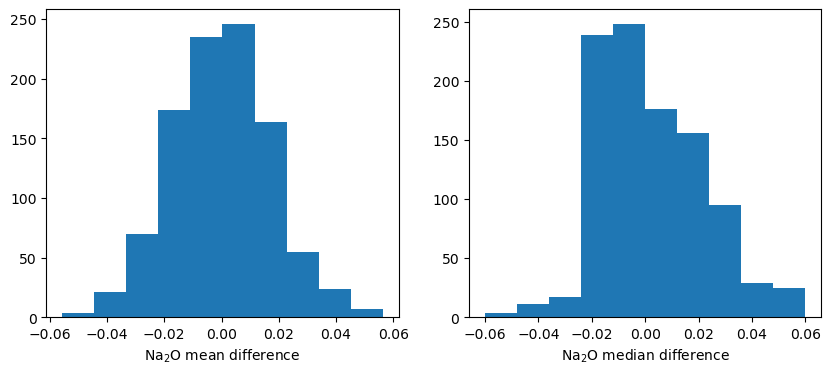

In [28]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(shuffled_fel_maf_mean,label='permutations')
plt.xlabel('Na$_2$O mean difference')

plt.subplot(1,2,2)
plt.hist(shuffled_fel_maf_median,label='permutations')
plt.xlabel('Na$_2$O median difference')

plt.show()

Notice how the distributions are centered around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

## Comparing the random permutations to the actual difference

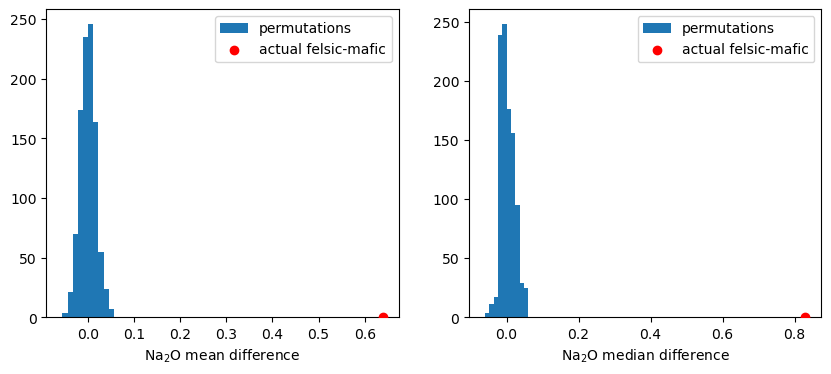

In [29]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(shuffled_fel_maf_mean,label='permutations')
plt.scatter(felsic_mafic_mean_diff,0,color='red',zorder=1000,label='actual felsic-mafic')
plt.xlabel('Na$_2$O mean difference')
plt.legend()

plt.subplot(1,2,2)
plt.hist(shuffled_fel_maf_median,label='permutations')
plt.scatter(felsic_mafic_median_diff,0,color='red',zorder=1000,label='actual felsic-mafic')
plt.xlabel('Na$_2$O median difference')
plt.legend()
plt.show()

We can calculate the empirical p-value as a measure of the evidence against the null hypothesis. A smaller p-value indicates that the observed mean difference is less likely to have occurred by chance, whereas a larger p-value suggests that the observed difference might be due to random variation.

To calculate this, we can compare the actual mean difference to the difference that arose through the reshuffled labels. And then can do the same for the median.

In [30]:
shuffled_fel_maf_mean_array = np.array(shuffled_fel_maf_mean)

mean_empirical_p = np.count_nonzero(shuffled_fel_maf_mean_array >= felsic_mafic_mean_diff) / repetitions
mean_empirical_p

0.0

In [31]:
shuffled_fel_maf_median_array = np.array(shuffled_fel_maf_median)

median_empirical_p = np.count_nonzero(shuffled_fel_maf_median_array >= felsic_mafic_median_diff) / repetitions
median_empirical_p

0.0

The empirical P-values are 0, meaning that none of the 1,000 permuted samples resulted in a difference that was as large as that which is observed in the actual samples. This is only an approximation. The exact chance of getting a difference in that range is not 0, but it is vanishingly small.

So it appears to be well-supported that felsic magmas have more Na$_2$O than mafic magmas.

## Testing the null hypothesis that there is no difference in the sodium content of intermediate and felsic lavas

In [32]:
volcanic_felsic_int = volcanic_data[(volcanic_data['COMPOSITION']=='FELSIC') | (volcanic_data['COMPOSITION']=='INTERMEDIATE')]
volcanic_felsic_int = volcanic_felsic_int[(volcanic_felsic_int['SIO2'] < 64) & (volcanic_felsic_int['SIO2'] > 51)]
volcanic_felsic_int = pd.DataFrame(volcanic_felsic_int,columns=['COMPOSITION','SIO2','NA2O'])
volcanic_felsic_int = volcanic_felsic_int.dropna()
volcanic_felsic_int.tail()

,COMPOSITION,SIO2,NA2O
66077,INTERMEDIATE,56.22,8.73
66078,INTERMEDIATE,55.52,8.42
66079,INTERMEDIATE,54.61,6.97
66080,INTERMEDIATE,53.15,8.15
66081,INTERMEDIATE,51.98,7.43


**Code for you to write**

**Calculate the difference in the median and the difference in the mean between the NA2O of intermediate and felsic lavas. Assign them to variables and print them.**

In [33]:
felsic_int_mean_diff = difference_of_means(volcanic_felsic_int,'NA2O','COMPOSITION',['FELSIC','INTERMEDIATE'])#complete the code
felsic_int_mean_diff

-0.3201393263807635

In [34]:
felsic_int_median_diff = difference_of_medians(volcanic_felsic_int,'NA2O','COMPOSITION',['FELSIC','INTERMEDIATE'])#complete the code
felsic_int_median_diff

-0.029999999999999805

**Code for you to write**

**Shuffle the compositions within the `volcanic_felsic_int` dataframe. Do it 1000 times and make histograms of the mean and median of these permutations that includes the actual median and mean that you calculated**

In [35]:
shuffled_fel_int_mean = []
shuffled_fel_int_median = []

repetitions = 1000

for i in np.arange(repetitions):
    volcanic_felsic_int['COMPOSITION_Shuffled'] = np.random.permutation(volcanic_felsic_int['COMPOSITION'].values)
    
    new_mean_diff = difference_of_means(volcanic_felsic_int,'NA2O','COMPOSITION_Shuffled',['FELSIC','INTERMEDIATE'])
    shuffled_fel_int_mean.append(new_mean_diff) 
    
    new_median_diff = difference_of_medians(volcanic_felsic_int,'NA2O','COMPOSITION_Shuffled',['FELSIC','INTERMEDIATE'])
    shuffled_fel_int_median.append(new_median_diff) 
    


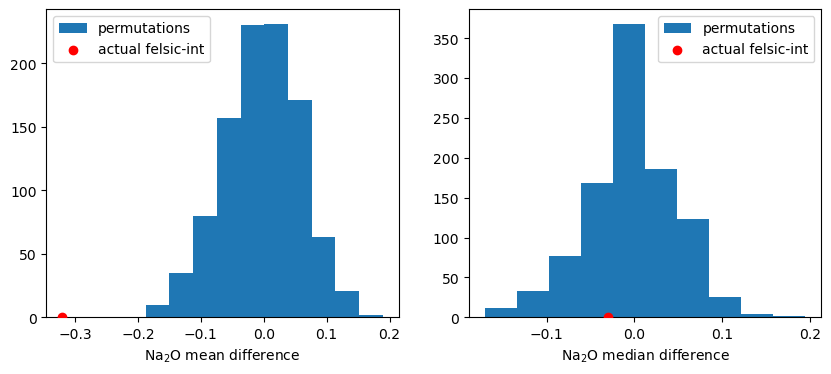

In [36]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(shuffled_fel_int_mean,label='permutations')
plt.scatter(felsic_int_mean_diff,0,color='red',zorder=1000,label='actual felsic-int')
plt.xlabel('Na$_2$O mean difference')
plt.legend()

plt.subplot(1,2,2)
plt.hist(shuffled_fel_int_median,label='permutations')
plt.scatter(felsic_int_median_diff,0,color='red',zorder=1000,label='actual felsic-int')
plt.xlabel('Na$_2$O median difference')
plt.legend()
plt.show()

**Calculate the p-value for the median and mean**

Given that the mean and median of the difference is negative (meaning that there is more $Na_2O$ in the intermediate rocks, we will look at the p-value associated with that difference arising through chance (i.e. felsic intermediate difference being a larger negative difference in the shuffled data vs. the actual data).

In [37]:
shuffled_fel_int_mean_array = np.array(shuffled_fel_int_mean)

empirical_p_mean = np.count_nonzero(shuffled_fel_int_mean_array <= felsic_int_mean_diff) / repetitions
empirical_p_mean

0.0

In [38]:
shuffled_fel_int_median_array = np.array(shuffled_fel_int_median)

empirical_p_median = np.count_nonzero(shuffled_fel_int_median <= felsic_int_median_diff) / repetitions
empirical_p_median

0.273